<a href="https://colab.research.google.com/github/Zakibrahmi/dataAnalysis/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)

In [15]:
dataset = pd.read_csv("/content/Mastercard_stock_history.csv", index_col="Date", parse_dates=["Date"]
).drop(["Dividends", "Stock Splits"], axis=1)
print(dataset.head())



                Open      High       Low     Close     Volume
Date                                                         
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000


In [16]:
dataset.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


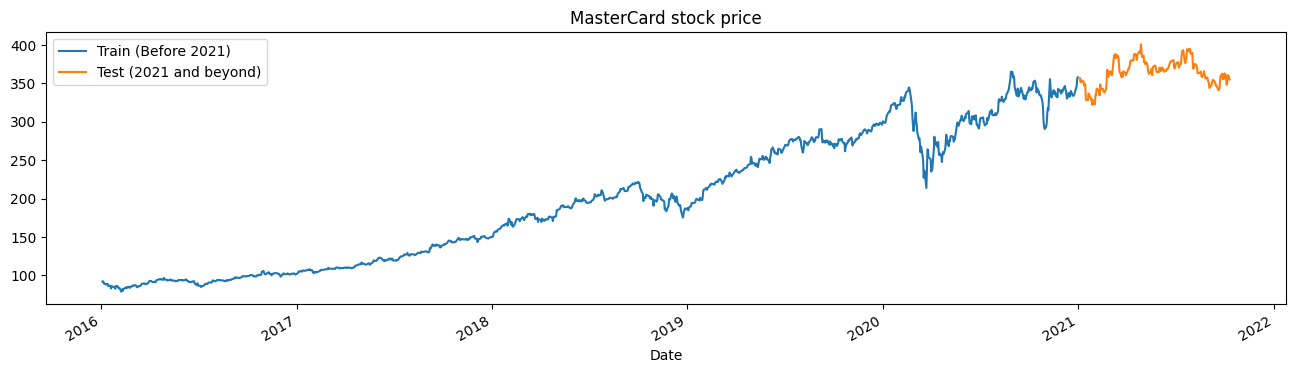

In [17]:
tstart = 2016
tend = 2020

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

train_test_plot(dataset,tstart,tend)

In [18]:
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
    test = dataset.loc[f"{tend+1}":, "High"].values
    return train, test
training_set, test_set = train_test_split(dataset, tstart, tend)


In [19]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)


In [20]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)


In [21]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)


LSTM Model
The model consists of a single hidden layer of LSTM and an output layer. You can experiment with the number of units, as more units will give you better results. For this experiment, we will set LSTM units to 125, tanh as activation, and set input size.

Note: Tensorflow library is user-friendly, so we don't have to create LSTM or GRU models from scratch. We will simply use the LSTM or GRU modules to construct the model.

Finally, we will compile the model with an RMSprop optimizer and mean square error as a loss function.

In [22]:
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 125)                 │          63,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             126 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,626 (248.54 KB)

 Trainable params: 63,626 (248.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0397
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0031
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0022
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0014
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0012
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0011
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 8.5686e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 7.7127e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 9.7362e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 9.0269e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 8.3626e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 7.8385e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 6.7353e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 6.9204e-04
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━

We are going to repeat preprocessing and normalize the test set. First of all we will transform then split the dataset into samples, reshape it, predict, and inverse transform the predictions into standard form.

In [24]:
dataset_total = dataset.loc[:,"High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)
#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [25]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))


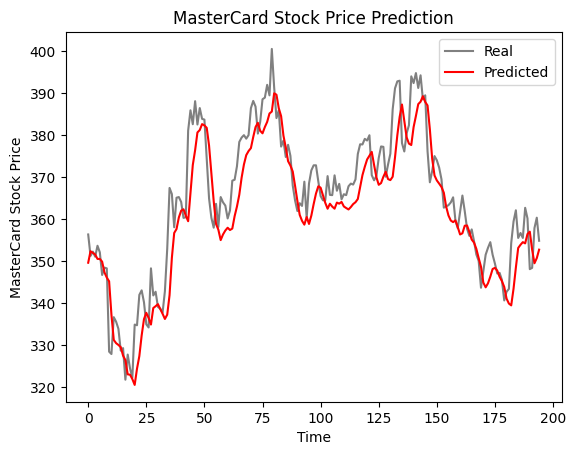

In [27]:
plot_predictions(test_set,predicted_stock_price)

